# Testing MobileNetV2

Berikut langkah-langkah tersebut

In [1]:
import os, sys, glob, datetime, time, pytz

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Defining variables
BAT_SIZE      = 20
DATA_SET_DIR  = '/home/jupyter/clothing-dataset/data/' # clothing dataset 10.000
WIDTH, HEIGHT = 128, 128
TEST_DIR      = DATA_SET_DIR + 'test'
MODEL         = 'MobileNetV2.model'

timezone = pytz.timezone("Asia/Jakarta")
now = timezone.localize(datetime.datetime.now())

## 1. Image augmentation untuk data testing

Di bawah ini adalah langkah pertama yang dilakukan.

Using TensorFlow backend.


Found 2500 images belonging to 10 classes.
Testing Sample


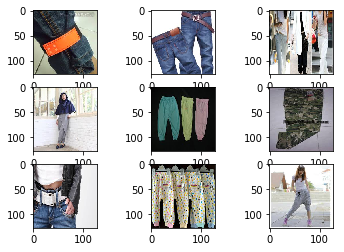

In [3]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(WIDTH, HEIGHT),
    batch_size=BAT_SIZE,
    shuffle=False
)

print('Testing Sample')
x,y = test_generator.next()
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    image = x[i]
    plt.imshow(image)

plt.show()

## 2. Testing model

Langkah berikutnya adalah testing menggunakan dataset testing.

Berikut adalah langkahnya

In [4]:
# Testing
from keras.models import load_model
from keras.utils.generic_utils import CustomObjectScope
from keras.metrics import top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

print('Loading saved model')
with CustomObjectScope({'top_3_accuracy': top_3_accuracy}):
    model = load_model(MODEL)

print('Testing...')
testing_start_datetime = timezone.localize(datetime.datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
testing_start = time.time()
Y_pred = model.predict_generator(
    test_generator, 
    steps=test_generator.samples // BAT_SIZE,
    verbose=1
)
testing_end = time.time()
testing_end_datetime = timezone.localize(datetime.datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
print('Testing from %s to %s taking %d seconds.' % (testing_start_datetime, testing_end_datetime, (testing_end - testing_start)))

W0725 01:16:24.196670 140382292686592 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 01:16:24.244661 140382292686592 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 01:16:24.265590 140382292686592 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 01:16:24.266242 140382292686592 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0725 01:16:24.268266 140382292

Loading saved model


W0725 01:16:25.797435 140382292686592 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0725 01:16:30.268511 140382292686592 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0725 01:16:33.455111 140382292686592 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 01:16:33.563318 140382292686592 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1

Testing...
125/125 [==============================] - 6s 49ms/step
Testing from 2019-07-25 01:16:35 to 2019-07-25 01:16:41 taking 6 seconds.


## Langkah tambahan: Tampilkan accuracy, loss, confusion matrix serta classification report

Langkah ini dilakukan untuk menampilkan kurva accuracy dan loss dari training yang telah dilakukan. Serta confusion matrix untuk testing. Selain itu detail laporan terkait precision, f-score dan recall juga ditampilkan di sini.

Berikut adalah langkahnya

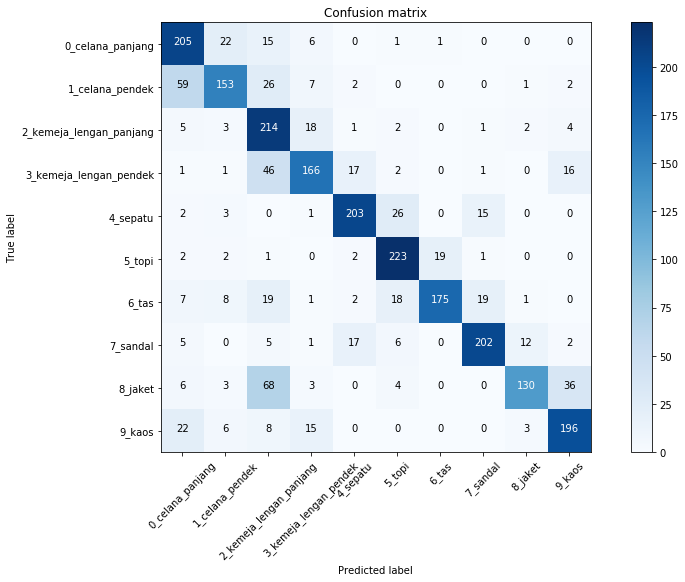

Classification Report
                         precision    recall  f1-score   support

       0_celana_panjang       0.65      0.82      0.73       250
        1_celana_pendek       0.76      0.61      0.68       250
2_kemeja_lengan_panjang       0.53      0.86      0.66       250
 3_kemeja_lengan_pendek       0.76      0.66      0.71       250
               4_sepatu       0.83      0.81      0.82       250
                 5_topi       0.79      0.89      0.84       250
                  6_tas       0.90      0.70      0.79       250
               7_sandal       0.85      0.81      0.83       250
                8_jaket       0.87      0.52      0.65       250
                 9_kaos       0.77      0.78      0.77       250

               accuracy                           0.75      2500
              macro avg       0.77      0.75      0.75      2500
           weighted avg       0.77      0.75      0.75      2500



In [5]:
# %matplotlib inline

# import matplotlib.pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
classes = sorted(os.listdir(TEST_DIR))
plt.figure(figsize=(12,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('Classification Report')
classification_report = classification_report(test_generator.classes, y_pred, target_names=classes)
print(classification_report)